# 説明変数
1. 触媒の化学構造
2. 基質の化学構造

(配位子、活性金属中心、反応物の構造や反応中間体を想定して記述子を作成するなど)

# 目的変数
1. 収率(%)

# 評価
### r2
精度の評価関数
0 ~ 100 %であり、1に近いほど良い。
「残差平方和÷全平方和」
### MRE
平均二乗誤差（MSE：Mean Squared Error）
予測値と正解値の差であり0であるほど良い。
「予測値 - 実測値」
### RMSE
MREの平方根

# RDkit
[公式(日本語)](https://rdkit.org/docs_jp/Getting_Started_with_RDKit_in_Python_jp.html#id1)
ケモインフォマティクス

# スケーリング
### 標準化
平均を0、分散を1とするスケーリング手法
(x_i - μ_x) / σ_x
(x - 平均) / 標準偏差

○いつ使うか？
最大値及び最小値が決まっていない場合
外れ値が存在する場合

### 正規化(min-max)
最小値を0、最大値を1とする0-1スケーリング手法
(x_i - x_min) / (x_max - x_min)

○いつ使うか？
最大値及び最小値が決まっている場合


＊ サンプル数50以上は欲しい。

# 記述子
分子記述子は分子の特徴の一部を表す。

- 分子内の芳香環の数
- 回転可能な結合の総数
- 分子の脂溶性を表すLogP
- 「薬らしさ」を表すQED

### 記述子の類似度の評価
タニモト係数で測定が可能

S_AB = c / (a + b - c)<br>
a: 分子Aのビット配列で1が立っている数<br>
b: 分子Bのビット配列で1が立っている数<br>
c: 分子AとBの共通で1が立っている数

# 記述子の種類
### MACCS Keys
- 166個の部分構造の有無
- 167ビット

### Topologicalフィンガープリント (RDKitフィンガープリント)
一定の結合数に相当する原子と結合種類を格納する

### Morganフィンガープリント (Circularフィンガープリント)
原子からある距離にある部分構造を数え上げる。<br>
各フィンガープリントは [ ID, （中心原子, radius) ] を表している。<br>
radiusを大きくすると含まれるフィンガープリントの数は増加する

[生成ルール](https://qiita.com/oki_kosuke/items/9a7b52911c4ef9d4edad)
[可視化](https://future-chem.com/rdkit-fp-visualize/)

### MinHashフィンガープリント
### Avalonフィンガープリント
### アトムペアフィンガープリント,トポロジカル２面角フィンガープリント
全ての原子同士について原子のアトムタイプとその最小結合距離。<br>
アトムタイプには
- 原子の種類
- 結合する重複原子の数
- π電子数

### ドナーアクセプターペアフィンガープリント
- 水素結合供与体
- 水素結合受容体

In [1]:
from rdkit import Chem
mol = Chem.MolFromSmiles('ClC1=CC=C(C(O)=O)C(O)=C1')

In [17]:
from rdkit.Chem import rdMolDescriptors
import numpy as np
import pandas as pd

bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi)
fp_df = pd.DataFrame([np.array(fp)])

In [18]:
print(len(list(fp.GetOnBits()))) # フィンガープリントの個数の表示
print(list(fp.GetOnBits()))  # フィンガープリントの表示

22
[67, 165, 205, 216, 389, 456, 561, 650, 807, 816, 875, 1047, 1380, 1519, 1602, 1607, 1683, 1750, 1873, 1917, 1991, 2016]


In [30]:
print(fp_df.iloc[:,67:69])
display(fp_df.iloc[:,:])

   67  68
0   1   0


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
len(bi.keys())

22

In [49]:
from IPython.display import SVG

ModuleNotFoundError: No module named 'keras'

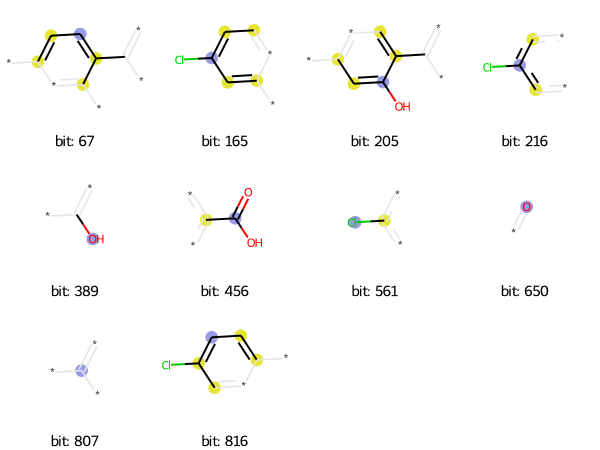

In [50]:
from rdkit.Chem import Draw

morgan_turples = ((mol,key,bi) for key in list(bi.keys())[:10])
SVG(Draw.DrawMorganBits(morgan_turples, molsPerRow=4, legends=['bit: '+str(x) for x in list(bi.keys())[:10]]))